In [5]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import numpy as np

lfw_people = fetch_lfw_people(min_faces_per_person=70,  download_if_missing = True, resize=1, color=False)
n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
Y = lfw_people.target

print(n_samples,h,w)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=47)

1288 125 94


(862, 11750)
(862,)
(426, 11750)
(426,)


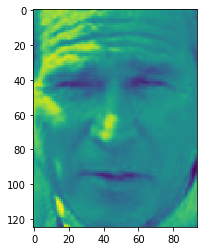

array([3, 4, 4, 0, 1, 2, 5, 3, 6, 3, 5, 6, 1, 3, 0, 3, 0, 2, 3, 1, 6, 1,
       4, 6, 2, 6, 3, 4, 0, 1, 1, 3, 1, 2, 1, 3, 4, 2, 1, 3, 1, 3, 1, 6,
       5, 3, 3, 5, 3, 3, 3, 3, 3, 3, 0, 0, 3, 4, 5, 6, 4, 3, 4, 4, 1, 0,
       3, 3, 3, 6, 5, 3, 6, 3, 3, 1, 5, 1, 4, 6, 3, 1, 5, 0, 1, 3, 6, 3,
       6, 3, 3, 3, 2, 1, 3, 3, 5, 0, 5, 6, 3, 5, 0, 6, 6, 3, 3, 2, 3, 3,
       3, 0, 1, 3, 3, 4, 2, 3, 2, 3, 2, 1, 4, 1, 6, 3, 6, 3, 1, 4, 1, 0,
       3, 3, 1, 5, 4, 6, 2, 0, 5, 3, 3, 1, 6, 3, 1, 1, 3, 6, 1, 5, 6, 6,
       6, 6, 2, 1, 3, 1, 3, 3, 6, 6, 3, 1, 4, 0, 2, 3, 3, 3, 6, 3, 4, 6,
       3, 5, 3, 2, 4, 3, 1, 5, 3, 6, 1, 3, 3, 3, 3, 1, 4, 3, 3, 0, 2, 3,
       4, 2, 1, 3, 3, 1, 5, 1, 0, 3, 1, 3, 3, 1, 3, 5, 3, 3, 1, 2, 3, 0,
       1, 3, 4, 3, 3, 3, 5, 1, 1, 3, 1, 3, 3, 3, 3, 2, 1, 3, 2, 3, 3, 0,
       6, 1, 1, 6, 5, 6, 3, 3, 3, 3, 4, 6, 6, 2, 3, 6, 1, 3, 3, 4, 3, 3,
       4, 3, 1, 1, 3, 4, 3, 3, 1, 3, 3, 3, 0, 3, 6, 1, 3, 4, 5, 2, 3, 3,
       3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6,

In [6]:
#x_train = tf.keras.utils.normalize(x_train, axis=1)
#x_test = tf.keras.utils.normalize(x_test, axis=1)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

x_train = x_train.reshape(x_train.shape[0],h,w,1)

x_train = x_train.astype('float32')
x_train = x_train/255

x_test = x_test.reshape(x_test.shape[0],h,w,1)
x_test = x_test.astype('float32')
x_test = x_test/255

#y_train = np.array([[x] for x in y_train])
#y_test = np.array([[x] for x in y_test])

#y_train = np.where(y_train == 1, 1, 0)
#y_test = np.where(y_test == 1, 1, 0)

x,y,r = x_test[5].shape
plt.imshow(x_test[5].reshape(x,y))
plt.show()

y_train

In [4]:
#One-hot encoding
from keras.utils import to_categorical

classes = {
  1: 'target1'
}

num_classes = len(classes)

y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)
y_train

Using TensorFlow backend.


IndexError: index 3 is out of bounds for axis 1 with size 1

In [308]:
from keras import models
from keras import layers


model2 = models.Sequential()

# keras.layers.Conv2D(filters, kernel_size... filter is how many filters (windows of sub pixel set) kernel is the window size eg: 3x3 pixels
model2.add(layers.Conv2D(32, (3,3), activation='relu',input_shape=(125, 94,1)))
model2.add(layers.MaxPool2D((2,2))) # Max Pooling to reduce the spatial dimensions of the output volume. pool_size: integer or tuple of 2 integers, factors by which to downscale (vertical, horizontal)
model2.add(layers.Conv2D(64,(3,3),activation='relu')) # does not need input_shape, since it gets it from previous layer
model2.add(layers.MaxPool2D((2,2)))
model2.add(layers.Conv2D(64,(3,3),activation='relu'))
model2.add(layers.Flatten()) # rewrite tensor to single vector of values
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax')) # softmax is good for output layer because Softmax outputs probabilities range. The range will 0 to 1, and the sum of all the probabilities will be equal to one. If the softmax function used for multi-classification model it returns the probabilities of each class and the target class will have the high probability.

model2.summary()

model.compile(loss='categorical_crossentropy', # loss is how to meassure how wrong the model is on its predictions
             optimizer='rmsprop', # "stochastic gradient descent" is a way to tell algorithm how to improve
             metrics=['accuracy'], # what do we care about in our model
             )
model.fit(x_train,
         y_train,
         epochs=8,
         verbose=True,
         batch_size=64,
         validation_split=0.1) # checking periodically how well we are doing

IndexError: index 3 is out of bounds for axis 1 with size 1

In [7]:
model = tf.keras.models.Sequential()

img_input = tf.keras.layers.Input(shape=(125, 94,1))

x = tf.keras.layers.Conv2D(64,3, activation='relu')(img_input)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(128, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(256, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

#x = tf.keras.layers.Conv2D(512, 3, activation='relu')(x) #d
#x = tf.keras.layers.MaxPooling2D(2)(x)

#x = tf.keras.layers.Conv2D(512, 3, activation='relu')(x) #d2
x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(4096, activation='relu')(x)
#x = tf.keras.layers.Dense(4096, activation='relu')(x) #d
x = tf.keras.layers.Dense(1000, activation='relu')(x)

x = tf.keras.layers.Dropout(0.5)(x) #0.2

output = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(img_input,output)

model.summary()
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.0005),
              metrics=['accuracy'])

model.fit(x_train, steps_per_epoch=5, epochs=80, validation_data=y_train, validation_steps=7, verbose=2)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 125, 94, 1)]      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 123, 92, 64)       640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 46, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 59, 44, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 22, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 20, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 10, 256)       0     

ValueError: The number of samples 862 is not divisible by steps 5. Please change the number of steps to a value that can consume all the samples

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) 
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy']) 


model.fit(x_train, y_train, epochs=15)

Train on 862 samples
Epoch 1/15
862/862 [==============================] - 0s 531us/sample - loss: 3.1180 - accuracy: 0.3213
Epoch 2/15
862/862 [==============================] - 0s 159us/sample - loss: 1.6574 - accuracy: 0.4176
Epoch 3/15
862/862 [==============================] - 0s 156us/sample - loss: 1.6056 - accuracy: 0.4327
Epoch 4/15
862/862 [==============================] - 0s 157us/sample - loss: 1.3389 - accuracy: 0.5313
Epoch 5/15
862/862 [==============================] - 0s 159us/sample - loss: 1.2153 - accuracy: 0.5708
Epoch 6/15
862/862 [==============================] - 0s 156us/sample - loss: 1.1053 - accuracy: 0.6160
Epoch 7/15
862/862 [==============================] - 0s 157us/sample - loss: 1.0543 - accuracy: 0.6439
Epoch 8/15
862/862 [==============================] - 0s 159us/sample - loss: 0.9939 - accuracy: 0.6555
Epoch 9/15
862/862 [==============================] - 0s 159us/sample - loss: 0.9109 - accuracy: 0.7007
Epoch 10/15
862/862 [======================

In [9]:
val_loss, val_acc = model.evaluate(x_test, y_test) #Calculate validation loss and validation accuracy
print(val_loss, val_acc) 

426/426 [==============================] - 0s 265us/sample - loss: 0.6758 - accuracy: 0.7770
0.6757917760963171 0.7769953


In [10]:
model.save('Convolutional_network.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: Convolutional_network.model\assets


INFO:tensorflow:Assets written to: Convolutional_network.model\assets


In [11]:
new_model = tf.keras.models.load_model('Convolutional_network.model')

In [12]:
predictions = new_model.predict(x_test)

In [18]:
import numpy as np

print('Id prediction:', np.argmax(predictions[0]))

Id prediction: 3


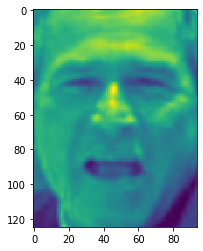

Id: 3


In [19]:
x,y,r = x_test[0].shape
plt.imshow(x_test[0].reshape(x,y))
plt.show()
print('Id:', y_test[0])